# Analyse the DST Data for 2010 - 2017

Disturbance Storm Time Index is a measure in the context of space weather. 

A negative DST value means that Earth's magnetic field is weakened. This is particularly the case durnig solar storms.

*from [wikipedia](https://en.wikipedia.org/wiki/Disturbance_storm_time_index)*

In this notebook we will try to analyze the DST readings from year 2010 to year 2017.

### Import required python modules

* [pandas](https://pandas.pydata.org) for manipulating data
* [matplotlib](https://matplotlib.org) for visualizing data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ask matplotlib to show plots inline 
%matplotlib inline

### Define the format of data

The data obtained from site was in __*WDC-like Dst format*__ which is a fixed width format. The description of format is given [here](http://wdc.kugi.kyoto-u.ac.jp/dstae/format/dstformat.html).

The indicies here are adjusted for zero based indexing as opposed to one based indexing in specification. Each tuple in `record_format` represents a half open interval. for example `(0,3)` takes column 0, 1 and 2 from the file and groups them into single column in loaded dataframe.

In [2]:
# this variable defines column specification
record_format = [(0,3), (3,5), (5,7), (7, 8) , 
                 (8, 10), (10,12), (12, 13), (13, 14), (14, 16), 
                 (16, 20), (20, 116), (116, 120)]

# Give friendly names to the columns see specifications in order to make sense of these
record_description = ['Index Name', 'Last YY', 'Month', '*', 'Date', 
                      'Quick Look', 'X', 'Version', 'Top YY', 
                      'Base Value', 'Hourly Values', 'Mean Value']

### Load the data

We will use the pandas `read_fwf()` function which is used to read *fixed width files* like the one we have.

In [3]:
# load the data using pandas dataframe. We could have used the "auto infer" feature instead of defining 
# the colspecs but that misses 'Quick Look' column
df = pd.read_fwf('dst_data/WWW_dstae00012385.dat', 
                 colspecs=record_format, header=None, 
                 names=record_description, delim_whitespace=False)

### Inspect the loaded dataframe

In [4]:
df.head()

,Index Name,Last YY,Month,*,Date,Quick Look,X,Version,Top YY,Base Value,Hourly Values,Mean Value
0,DST,10,1,*,1,NaN,X,2,20,0,5 4 4 2 0 0 2 2 2 0 -1 1 ...,5
1,DST,10,1,*,2,NaN,X,2,20,0,8 10 13 13 12 12 10 13 12 10 9 9 ...,11
2,DST,10,1,*,3,NaN,X,2,20,0,6 5 5 6 7 6 2 -3 -4 -2 -3 -7 ...,0
3,DST,10,1,*,4,NaN,X,2,20,0,-1 1 4 5 2 -2 -2 -4 -3 -2 -4 -5...,-2
4,DST,10,1,*,5,NaN,X,2,20,0,0 1 5 4 4 3 4 5 6 3 -1 -2 ...,0


### Visualize the Yearly Mean DST 

Get Mean DST grouped by year.

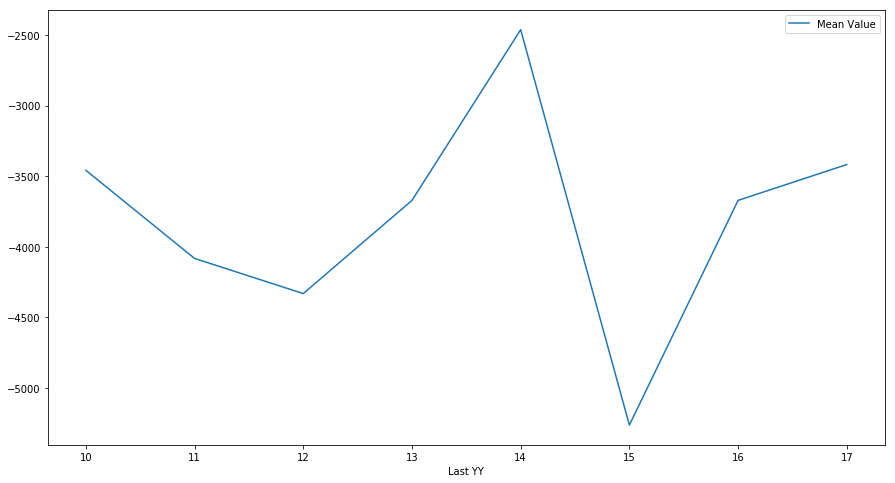

In [13]:
# extract relevant fields
yearly_Mean_dst = df[['Last YY', 'Mean Value']]
# group data by year and aggregate
yearly_Mean_dst = yearly_Mean_dst.groupby('Last YY').aggregate(sum)
# plot data
fig = yearly_Mean_dst.plot(kind='line').get_figure()
fig.savefig('images/yearly_mean.eps', format='eps', dpi=1000)

#### Observation(s)

* Mean DST was highest in 2014 and Lowest in 2015

### Visualize the Monthly Mean DST for each year 

In [6]:
# get the relevant fields from the data frame
monthly_per_year = df[['Last YY', 'Month', 'Mean Value']]

# group the fields by month of each year and aggregate the Mean DST for each month
monthly_per_year = monthly_per_year.groupby(['Last YY', 'Month'])['Mean Value'].sum()

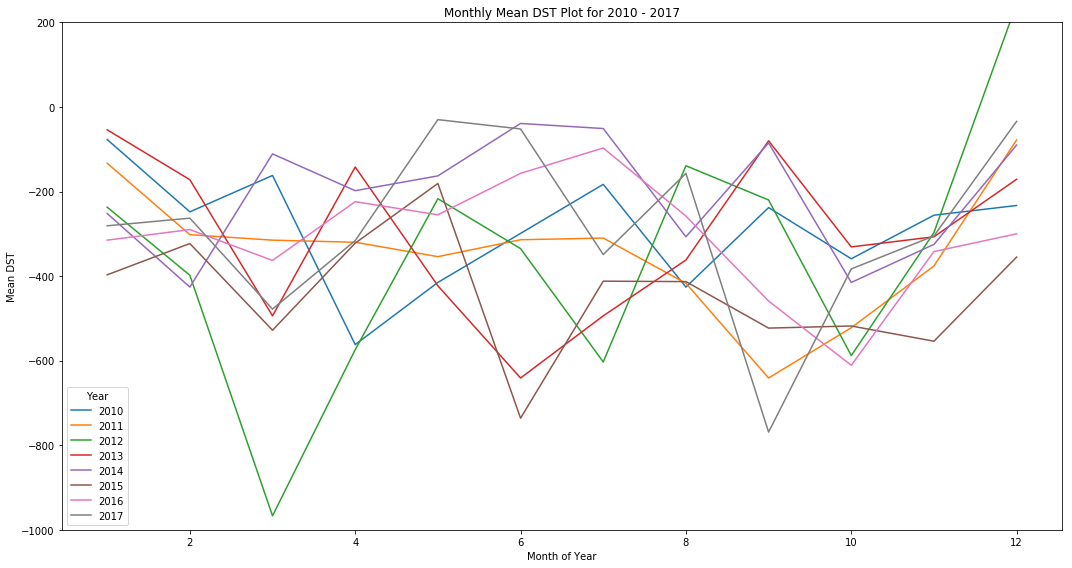

In [14]:
# variable for subplot grid
# i = 1

# increase the size of figure
plt.rcParams['figure.figsize'] = (15,8)
# variable to store legends
legend = []

plt.title('Monthly Mean DST Plot for 2010 - 2017')
# get monthly data for each year
for year, monthly_data  in monthly_per_year.groupby(level=0):
    # plot the data
    # plt.subplot(3, 3, i)
    plt.tight_layout()
    plt.ylim(-1000, 200)
    plt.ylabel('Mean DST')
    plt.xlabel('Month of Year')
    plt.plot(monthly_data.index.get_level_values('Month'), monthly_data)
    # populate legend
    legend.append(str(20) + str(year))
    plt.legend(legend, title="Year")
    # i = i + 1

plt.savefig('images/monthly_mean.eps', format='eps', dpi=1000)

#### Few Observations

* From the plot above we notice that in December 2012 the mean DST was positive. This is a noticeable anomaly.
* In 3<sup>rd</sup> month we see a dip in mean DST except for year 2010, 2014
* The mean DST generally remained between 0 and -500 with few outliers over the peroid of 2010-2017
* In 10<sup>th</sup> month we see a decrease in mean DST except for year 2017 in which there is a increase in DST 

### Daily Mean DST Plot per Month

Now we will Visualize the daily Mean DST per Month form year 2010 to 2017.

We will define a function which takes the last two digits of year as input and plots the mean Daily DST for each month in given year 

In [8]:
def plot_daily_per_month(year):
    ''' Plot the daily mean DST for each month in a year.
    arguments:
        year -- last two digits of year for which you want to 
                plot daily mean DST for each Month
    '''
    
    # try to cast year into int
    try:
        year = int(year)
    # cannot cast year into int. Yell at user and return
    except ValueError as e:
        print('Error: ' + str(e));
        return
    
    # get the daily data for the specified year
    daily_per_month = df[df['Last YY'] == year]
    # group the data by month and date
    daily_per_month = daily_per_month.groupby(['Month', 'Date'])['Mean Value'].sum()
    
    # add Lines Style since colors are repeated
    LINE_STYLES = ['-', '--', '-.']
    NUM_STYLES = len(LINE_STYLES)
    
    # set plot parameters
    plt.tight_layout()
    plt.grid()
    plt.title('Daily DST Plot for Year 20{}'.format(year))
    plt.ylim(-140, 30)
    plt.ylabel('Mean DST(nT)')
    plt.xlabel('Day of Month')
    plt.axhline(y=-50, linestyle="-.", color="#006400", label="reference")
    
    # plot the graphs
    for month, daily_data in daily_per_month.groupby(level=0):
        plt.plot(daily_data.index.get_level_values('Date'), daily_data, 
                 LINE_STYLES[(month % NUM_STYLES)], label=str(month).zfill(2))
        
    # add legend
    plt.legend(title='Month')
    # these lines tells matplotlib that we are finished plotting this graph.
    # Useful when calling this function inside a loop
    plt.savefig('images/year_{}.eps'.format(year), format='eps', dpi=1000)
    plt.show()
    plt.close()

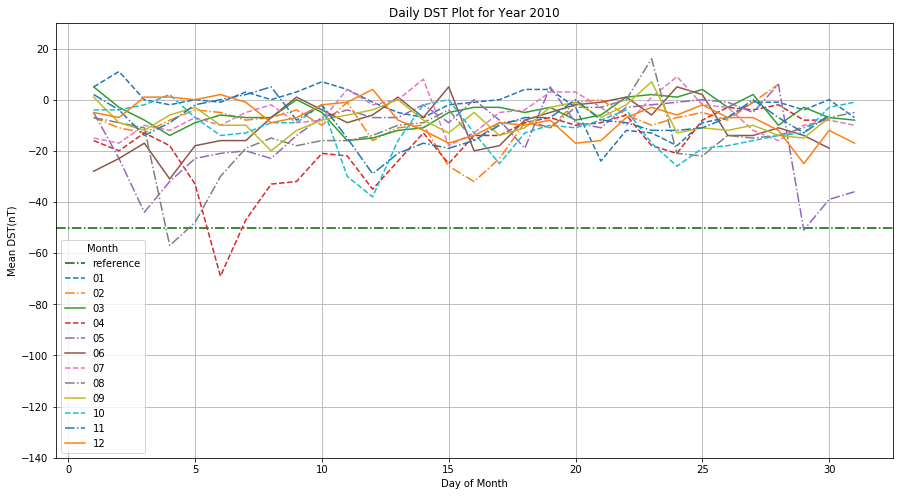

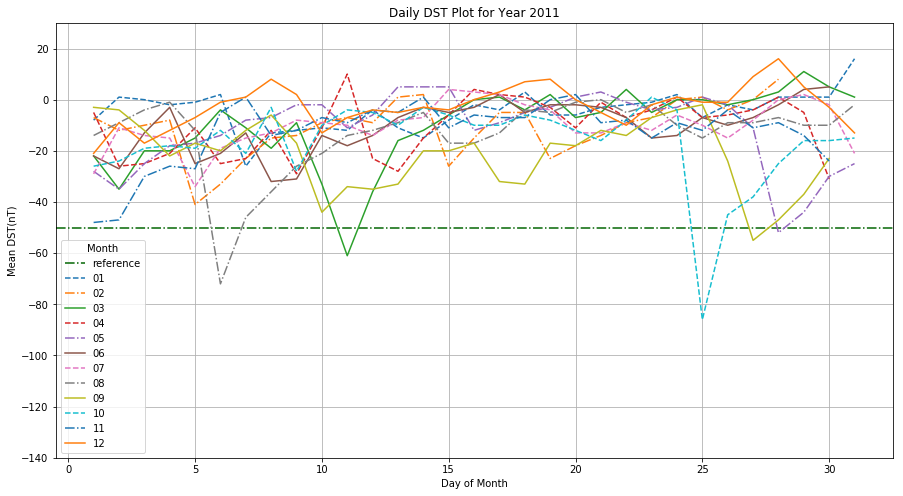

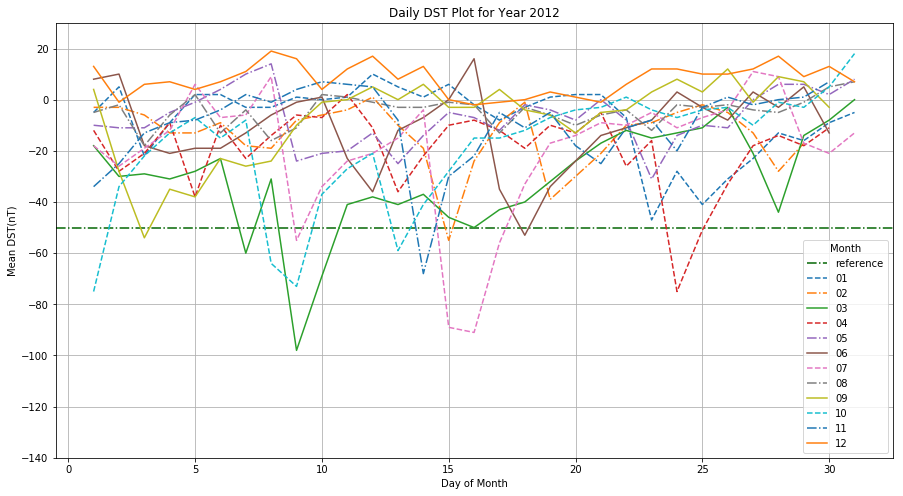

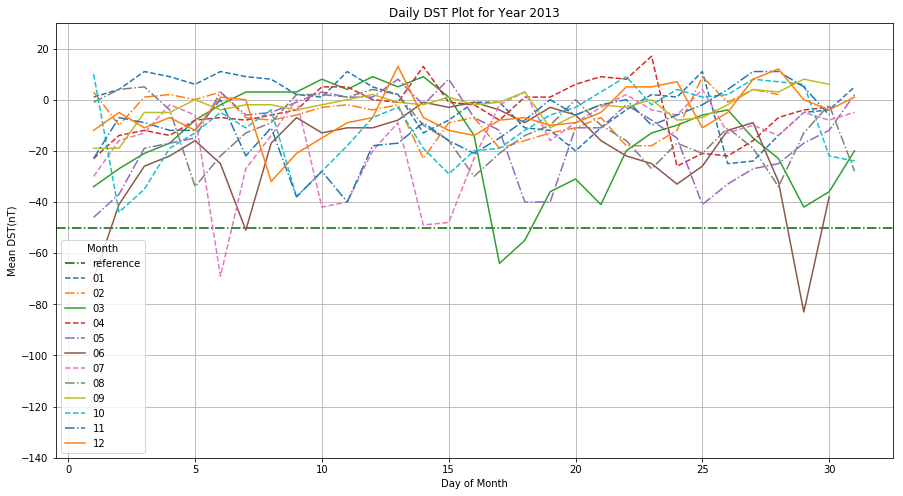

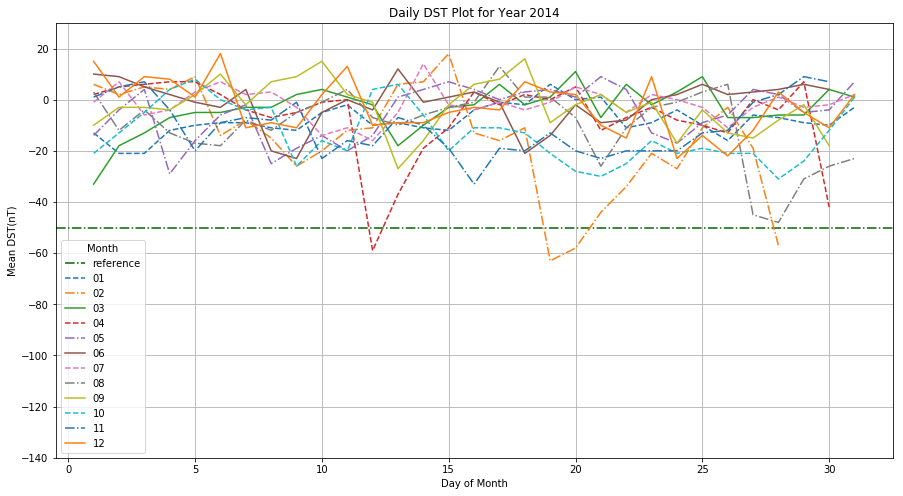

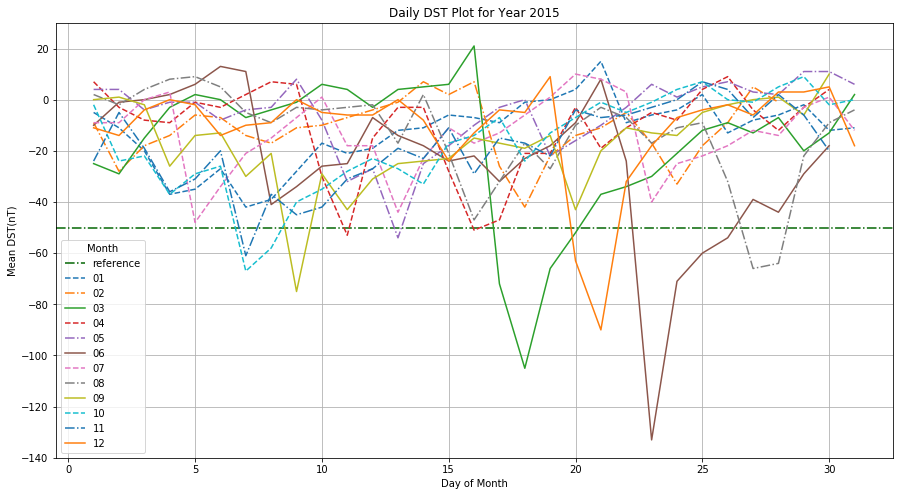

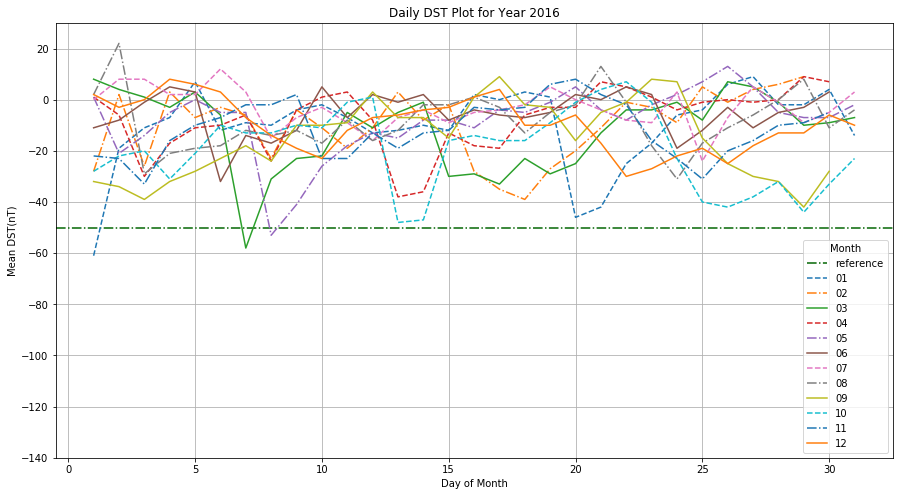

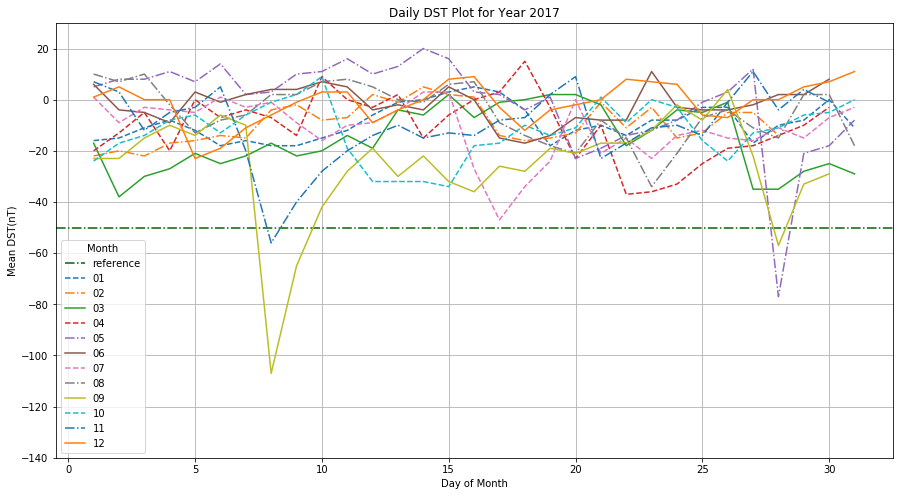

In [10]:
plt.rcParams['figure.figsize'] = (15, 8)
# plot graphs for all the year. Right now the year values are hard coded
for i in range(10, 18):
    plot_daily_per_month(i)

#### Few Observations

According to the [this paper](http://onlinelibrary.wiley.com/doi/10.1029/2001JA007532/full). A DST index of less than **-50 nT** is often used indicate that a magnetic storm is in progress.

* There were atleast 2 magnetic storms in 2010
* 2011 had atleast 5 magnetic storms
* 2012 had atleast 11 magnetic storms
* 2013 had atleast 4 magnetic storms
* 2014 had atleast 3 magnetic storms
* 2015 had atleast 9 magnetic storms
* 2016 had atleast 3 magnetic storms
* 2017 had atleast 4 magnetic storms